## UmojaHack Africa 2021 #3: Financial Resilience Challenge (BEGINNER) by UmojaHack Africa

Can you predict if an individual will be able to make a payment in an emergency situation?

The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient.


![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/151/thumb_cdf71374-9857-44bb-8216-5f8c67afb51f.png)

This is a simple Python starter notebook to get you started with the Financial Resilience Challenge.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')
variable_definations = pd.read_csv('VariableDefinitions.csv')

In [3]:
# Preview the first five rows of the train set
train.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [4]:
# Preview the first five rows of the test set
test.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,...,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [5]:
# Preview the first five rows of the sample submission file
samplesubmission.head()

,ID,target
0,ID_0000005111,NaN
1,ID_0000389416,NaN
2,ID_0000634789,NaN
3,ID_0000778100,NaN
4,ID_0001123210,NaN


In [6]:
# Preview variable definations
variable_definations

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [7]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (104867, 36)
The shape of the test set is: (44943, 35)


# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
train.drop(['region', 'country'] , axis='columns', inplace=True)
train.head()

# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
test.drop(['region', 'country'] , axis='columns', inplace=True)
test.head()

### Check for missing values

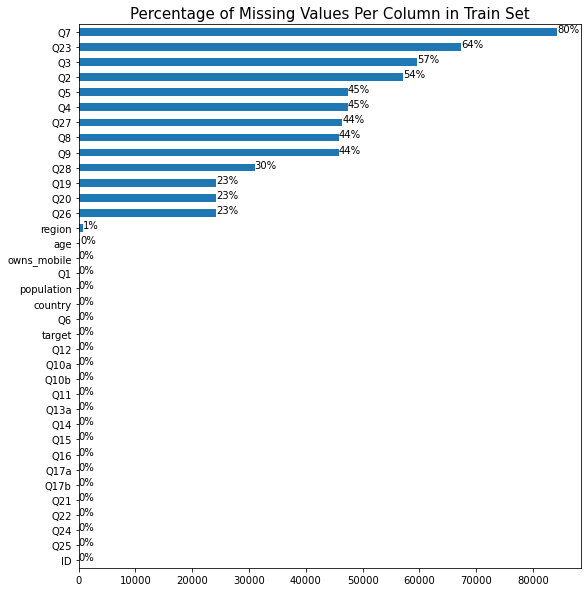

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

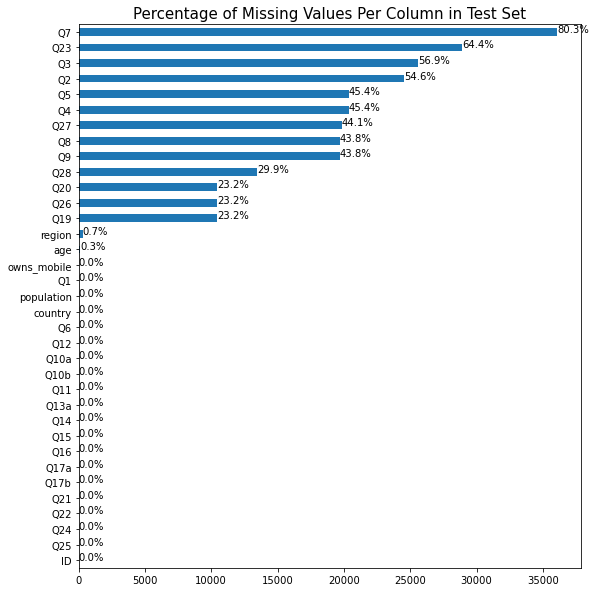

In [9]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

## Distribution of the target variable

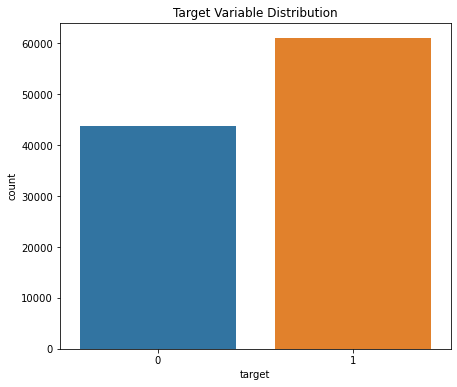

In [11]:
plt.figure(figsize=(7, 6))
sns.countplot(train.target)
plt.title('Target Variable Distribution');

This shows us that the target (Can you make a payment if you were in an emergency) is fairly balanced. The majority class in this dataset are people who can make a payment incase of an emergency

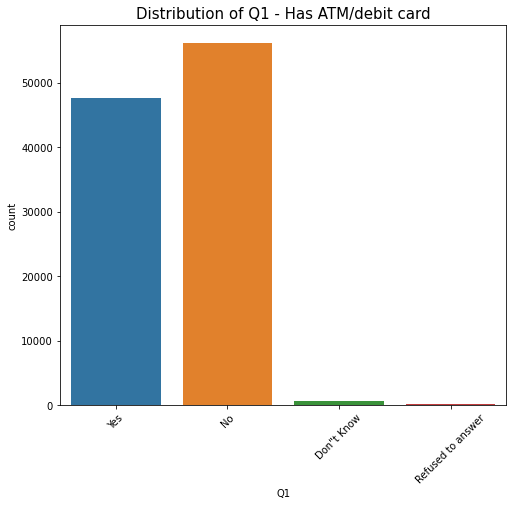

In [12]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(train.Q1)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q1 - Has ATM/debit card', fontdict = {'size': 15});

This shows that most people do not own a debit or ATM card

## Combine train and test set for easy preprocessing 

In [13]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 36)


In [14]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q2           68137 non-null   float64
 7   Q3           64562 non-null   float64
 8   Q4           82004 non-null   float64
 9   Q5           82004 non-null   float64
 10  Q6           149810 non-null  int64  
 11  Q7           29515 non-null   float64
 12  Q8           84272 non-null   float64
 13  Q9           84272 non-null   float64
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

In [15]:
# Category columns 
cat_cols = ['country',	'region', 'owns_mobile']
num_cols = ['age', 'population'] + [x for x in all_data.columns if x.startswith('Q')]

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  int64   
 6   Q2           68137 non-null   float64 
 7   Q3           64562 non-null   float64 
 8   Q4           82004 non-null   float64 
 9   Q5           82004 non-null   float64 
 10  Q6           149810 non-null  int64   
 11  Q7           29515 non-null   float64 
 12  Q8           84272 non-null   float64 
 13  Q9           84272 non-null   float64 
 14  Q10a         149810 non-null  int64   
 15  Q10b         149810 non-null  int64   
 16  Q11          149810 non-null  int64   
 17  Q12          149810 non-null  int64   
 18  Q13a

### Number of unique values per categorical column

In [16]:
# Check unique values for each categorical column
for col in cat_cols:
  print(col, all_data[col].nunique())

country 144
region 8
owns_mobile 4


## Fill in missing values
Missing values can be filled using different strategies
 - Mean
 - Max
 - Min
 - for categorical variables - mode
 - [sklearn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
 - Others... do more reasearch

In [17]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

### Feature Engineering
#### Try different strategies of dealing with categorical variables
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [18]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,region_High income: OECD,region_High income: nonOECD,region_Latin America & Caribbean (excluding high income),region_Middle East & North Africa (excluding high income),region_South Asia,region_Sub-Saharan Africa (excluding high income),owns_mobile_1.0,owns_mobile_2.0,owns_mobile_3.0,owns_mobile_4.0
0,ID_0000020532,25550170.0,66.0,2,9999.0,9999.0,9999.0,9999.0,2,9999.0,...,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,2,9999.0,9999.0,2.0,2.0,2,9999.0,...,0,0,0,1,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,9999.0,...,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,9999.0,...,1,0,0,0,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,2,9999.0,9999.0,9999.0,9999.0,2,9999.0,...,0,0,1,0,0,0,1,0,0,0


In [19]:
# Shape of data before encoding
all_data.shape

(149810, 189)

sum_column = all_data["Q9"] + all_data["Q7"]
all_data["Q97"] = sum_column
all_data.head()

all_data.info()

sum_column = all_data["Q25"] + all_data["Q24"]
all_data["Q29"] = sum_column
all_data.info()

sum_column = all_data["Q26"] + all_data["Q27"]
all_data["Q33"] = sum_column
all_data.info()

all_data.drop(['Q9', 'Q7', 'Q25', 'Q24', 'Q26', 'Q27'] , axis='columns', inplace=True)
all_data.head()

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Columns: 189 entries, ID to owns_mobile_4.0
dtypes: float64(16), int64(16), object(1), uint8(156)
memory usage: 60.0+ MB


In [21]:
import re
all_data = all_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [22]:
# Shape of data after encoding
all_data.shape

(149810, 189)

In [23]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((104867, 189), (44943, 189))

### Training and making predictions

- Is lgbm the best model for this challenge?
- Parameter tuning
  - Grid search, random search, perhaps bayesian search works better...

In [50]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID', 'target'])
X = train_df[main_cols]
y = train_df.target.astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Train model
model = RandomForestClassifier(n_jobs=-1,criterion='entropy',min_samples_split=10,n_estimators=400,random_state=99)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'RandomForest AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

RandomForest AUC score on the X_test is: 0.7875615037780603

              precision    recall  f1-score   support

           0       0.68      0.60      0.64     13159
           1       0.73      0.80      0.76     18302

    accuracy                           0.71     31461
   macro avg       0.71      0.70      0.70     31461
weighted avg       0.71      0.71      0.71     31461



### Train different model and compare results

In [25]:
all_data['target'].value_counts()

1.0    61011
0.0    43856
Name: target, dtype: int64

In [26]:
import lightgbm as lgb

In [64]:
# Train model
model = lgb.LGBMClassifier( n_estimators=5000,
                            boosting_type='dart',             
                            learning_rate=0.03,
                            is_unbalanced=True)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

[LightGBM] [Warning] Unknown parameter: is_unbalanced
LGBM AUC score on the X_test is: 0.848900262916654

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     13159
           1       0.80      0.81      0.80     18302

    accuracy                           0.77     31461
   macro avg       0.76      0.76      0.76     31461
weighted avg       0.77      0.77      0.77     31461



In [58]:
from sklearn.ensemble import VotingClassifier
cat=CatBoostClassifier(iterations=3000, eval_metric='AUC', 
                                     learning_rate=0.03)
clf=lgb.LGBMClassifier(n_estimators=3000,
            boosting_type='dart',             
            learning_rate=0.03,
            objective = 'binary',
            metric = 'auc')
voting_clf = VotingClassifier(estimators=[('cat',cat),
                                          ('clf', clf)],
                                           voting='soft', weights=None)
voting_clf = voting_clf.fit(X, y)
y_pred_voting_clf=voting_clf.predict(X_test)
print("roc: ",roc_auc_score(y_test, y_pred_voting_clf))

0:	total: 44.3ms	remaining: 2m 12s
1:	total: 80.3ms	remaining: 2m
2:	total: 105ms	remaining: 1m 45s
3:	total: 128ms	remaining: 1m 35s
4:	total: 153ms	remaining: 1m 31s
5:	total: 178ms	remaining: 1m 28s
6:	total: 199ms	remaining: 1m 24s
7:	total: 221ms	remaining: 1m 22s
8:	total: 243ms	remaining: 1m 20s
9:	total: 271ms	remaining: 1m 21s
10:	total: 294ms	remaining: 1m 19s
11:	total: 317ms	remaining: 1m 18s
12:	total: 337ms	remaining: 1m 17s
13:	total: 360ms	remaining: 1m 16s
14:	total: 382ms	remaining: 1m 16s
15:	total: 404ms	remaining: 1m 15s
16:	total: 425ms	remaining: 1m 14s
17:	total: 452ms	remaining: 1m 14s
18:	total: 473ms	remaining: 1m 14s
19:	total: 496ms	remaining: 1m 13s
20:	total: 518ms	remaining: 1m 13s
21:	total: 540ms	remaining: 1m 13s
22:	total: 562ms	remaining: 1m 12s
23:	total: 583ms	remaining: 1m 12s
24:	total: 603ms	remaining: 1m 11s
25:	total: 628ms	remaining: 1m 11s
26:	total: 650ms	remaining: 1m 11s
27:	total: 669ms	remaining: 1m 11s
28:	total: 693ms	remaining: 1m 1

237:	total: 5.29s	remaining: 1m 1s
238:	total: 5.31s	remaining: 1m 1s
239:	total: 5.33s	remaining: 1m 1s
240:	total: 5.36s	remaining: 1m 1s
241:	total: 5.38s	remaining: 1m 1s
242:	total: 5.4s	remaining: 1m 1s
243:	total: 5.42s	remaining: 1m 1s
244:	total: 5.44s	remaining: 1m 1s
245:	total: 5.46s	remaining: 1m 1s
246:	total: 5.48s	remaining: 1m 1s
247:	total: 5.5s	remaining: 1m 1s
248:	total: 5.53s	remaining: 1m 1s
249:	total: 5.55s	remaining: 1m 1s
250:	total: 5.57s	remaining: 1m
251:	total: 5.59s	remaining: 1m
252:	total: 5.61s	remaining: 1m
253:	total: 5.63s	remaining: 1m
254:	total: 5.65s	remaining: 1m
255:	total: 5.67s	remaining: 1m
256:	total: 5.7s	remaining: 1m
257:	total: 5.71s	remaining: 1m
258:	total: 5.74s	remaining: 1m
259:	total: 5.76s	remaining: 1m
260:	total: 5.78s	remaining: 1m
261:	total: 5.8s	remaining: 1m
262:	total: 5.82s	remaining: 1m
263:	total: 5.84s	remaining: 1m
264:	total: 5.87s	remaining: 1m
265:	total: 5.89s	remaining: 1m
266:	total: 5.91s	remaining: 1m
267:	

477:	total: 10.4s	remaining: 54.9s
478:	total: 10.4s	remaining: 54.8s
479:	total: 10.4s	remaining: 54.8s
480:	total: 10.5s	remaining: 54.8s
481:	total: 10.5s	remaining: 54.7s
482:	total: 10.5s	remaining: 54.7s
483:	total: 10.5s	remaining: 54.7s
484:	total: 10.5s	remaining: 54.7s
485:	total: 10.6s	remaining: 54.6s
486:	total: 10.6s	remaining: 54.6s
487:	total: 10.6s	remaining: 54.6s
488:	total: 10.6s	remaining: 54.5s
489:	total: 10.6s	remaining: 54.5s
490:	total: 10.7s	remaining: 54.5s
491:	total: 10.7s	remaining: 54.4s
492:	total: 10.7s	remaining: 54.4s
493:	total: 10.7s	remaining: 54.4s
494:	total: 10.7s	remaining: 54.4s
495:	total: 10.8s	remaining: 54.3s
496:	total: 10.8s	remaining: 54.3s
497:	total: 10.8s	remaining: 54.3s
498:	total: 10.8s	remaining: 54.3s
499:	total: 10.8s	remaining: 54.2s
500:	total: 10.9s	remaining: 54.2s
501:	total: 10.9s	remaining: 54.2s
502:	total: 10.9s	remaining: 54.1s
503:	total: 10.9s	remaining: 54.1s
504:	total: 11s	remaining: 54.1s
505:	total: 11s	remain

714:	total: 15.5s	remaining: 49.5s
715:	total: 15.5s	remaining: 49.4s
716:	total: 15.5s	remaining: 49.4s
717:	total: 15.5s	remaining: 49.4s
718:	total: 15.6s	remaining: 49.4s
719:	total: 15.6s	remaining: 49.3s
720:	total: 15.6s	remaining: 49.3s
721:	total: 15.6s	remaining: 49.3s
722:	total: 15.7s	remaining: 49.3s
723:	total: 15.7s	remaining: 49.3s
724:	total: 15.7s	remaining: 49.3s
725:	total: 15.7s	remaining: 49.2s
726:	total: 15.7s	remaining: 49.2s
727:	total: 15.8s	remaining: 49.2s
728:	total: 15.8s	remaining: 49.2s
729:	total: 15.8s	remaining: 49.1s
730:	total: 15.8s	remaining: 49.1s
731:	total: 15.9s	remaining: 49.1s
732:	total: 15.9s	remaining: 49.1s
733:	total: 15.9s	remaining: 49.1s
734:	total: 15.9s	remaining: 49.1s
735:	total: 15.9s	remaining: 49s
736:	total: 16s	remaining: 49s
737:	total: 16s	remaining: 49s
738:	total: 16s	remaining: 49s
739:	total: 16s	remaining: 48.9s
740:	total: 16s	remaining: 48.9s
741:	total: 16.1s	remaining: 48.9s
742:	total: 16.1s	remaining: 48.9s
743

956:	total: 20.8s	remaining: 44.4s
957:	total: 20.8s	remaining: 44.4s
958:	total: 20.8s	remaining: 44.4s
959:	total: 20.9s	remaining: 44.3s
960:	total: 20.9s	remaining: 44.3s
961:	total: 20.9s	remaining: 44.3s
962:	total: 20.9s	remaining: 44.3s
963:	total: 20.9s	remaining: 44.2s
964:	total: 21s	remaining: 44.2s
965:	total: 21s	remaining: 44.2s
966:	total: 21s	remaining: 44.2s
967:	total: 21s	remaining: 44.2s
968:	total: 21.1s	remaining: 44.1s
969:	total: 21.1s	remaining: 44.1s
970:	total: 21.1s	remaining: 44.1s
971:	total: 21.1s	remaining: 44.1s
972:	total: 21.1s	remaining: 44s
973:	total: 21.2s	remaining: 44s
974:	total: 21.2s	remaining: 44s
975:	total: 21.2s	remaining: 44s
976:	total: 21.2s	remaining: 44s
977:	total: 21.3s	remaining: 43.9s
978:	total: 21.3s	remaining: 43.9s
979:	total: 21.3s	remaining: 43.9s
980:	total: 21.3s	remaining: 43.9s
981:	total: 21.3s	remaining: 43.9s
982:	total: 21.4s	remaining: 43.8s
983:	total: 21.4s	remaining: 43.8s
984:	total: 21.4s	remaining: 43.8s
985

1195:	total: 26.1s	remaining: 39.4s
1196:	total: 26.1s	remaining: 39.3s
1197:	total: 26.1s	remaining: 39.3s
1198:	total: 26.2s	remaining: 39.3s
1199:	total: 26.2s	remaining: 39.3s
1200:	total: 26.2s	remaining: 39.2s
1201:	total: 26.2s	remaining: 39.2s
1202:	total: 26.2s	remaining: 39.2s
1203:	total: 26.3s	remaining: 39.2s
1204:	total: 26.3s	remaining: 39.2s
1205:	total: 26.3s	remaining: 39.1s
1206:	total: 26.3s	remaining: 39.1s
1207:	total: 26.4s	remaining: 39.1s
1208:	total: 26.4s	remaining: 39.1s
1209:	total: 26.4s	remaining: 39.1s
1210:	total: 26.4s	remaining: 39s
1211:	total: 26.4s	remaining: 39s
1212:	total: 26.5s	remaining: 39s
1213:	total: 26.5s	remaining: 39s
1214:	total: 26.5s	remaining: 38.9s
1215:	total: 26.5s	remaining: 38.9s
1216:	total: 26.6s	remaining: 38.9s
1217:	total: 26.6s	remaining: 38.9s
1218:	total: 26.6s	remaining: 38.9s
1219:	total: 26.6s	remaining: 38.8s
1220:	total: 26.6s	remaining: 38.8s
1221:	total: 26.7s	remaining: 38.8s
1222:	total: 26.7s	remaining: 38.8s


1433:	total: 31.4s	remaining: 34.2s
1434:	total: 31.4s	remaining: 34.2s
1435:	total: 31.4s	remaining: 34.2s
1436:	total: 31.4s	remaining: 34.2s
1437:	total: 31.4s	remaining: 34.2s
1438:	total: 31.5s	remaining: 34.1s
1439:	total: 31.5s	remaining: 34.1s
1440:	total: 31.5s	remaining: 34.1s
1441:	total: 31.5s	remaining: 34.1s
1442:	total: 31.6s	remaining: 34.1s
1443:	total: 31.6s	remaining: 34s
1444:	total: 31.6s	remaining: 34s
1445:	total: 31.6s	remaining: 34s
1446:	total: 31.6s	remaining: 34s
1447:	total: 31.7s	remaining: 33.9s
1448:	total: 31.7s	remaining: 33.9s
1449:	total: 31.7s	remaining: 33.9s
1450:	total: 31.7s	remaining: 33.9s
1451:	total: 31.8s	remaining: 33.9s
1452:	total: 31.8s	remaining: 33.8s
1453:	total: 31.8s	remaining: 33.8s
1454:	total: 31.8s	remaining: 33.8s
1455:	total: 31.8s	remaining: 33.8s
1456:	total: 31.9s	remaining: 33.7s
1457:	total: 31.9s	remaining: 33.7s
1458:	total: 31.9s	remaining: 33.7s
1459:	total: 31.9s	remaining: 33.7s
1460:	total: 32s	remaining: 33.7s
14

1666:	total: 36.7s	remaining: 29.3s
1667:	total: 36.7s	remaining: 29.3s
1668:	total: 36.7s	remaining: 29.3s
1669:	total: 36.7s	remaining: 29.2s
1670:	total: 36.7s	remaining: 29.2s
1671:	total: 36.8s	remaining: 29.2s
1672:	total: 36.8s	remaining: 29.2s
1673:	total: 36.8s	remaining: 29.2s
1674:	total: 36.8s	remaining: 29.1s
1675:	total: 36.9s	remaining: 29.1s
1676:	total: 36.9s	remaining: 29.1s
1677:	total: 36.9s	remaining: 29.1s
1678:	total: 36.9s	remaining: 29s
1679:	total: 36.9s	remaining: 29s
1680:	total: 37s	remaining: 29s
1681:	total: 37s	remaining: 29s
1682:	total: 37s	remaining: 29s
1683:	total: 37s	remaining: 28.9s
1684:	total: 37s	remaining: 28.9s
1685:	total: 37.1s	remaining: 28.9s
1686:	total: 37.1s	remaining: 28.9s
1687:	total: 37.1s	remaining: 28.8s
1688:	total: 37.1s	remaining: 28.8s
1689:	total: 37.2s	remaining: 28.8s
1690:	total: 37.2s	remaining: 28.8s
1691:	total: 37.2s	remaining: 28.8s
1692:	total: 37.2s	remaining: 28.7s
1693:	total: 37.2s	remaining: 28.7s
1694:	total:

1904:	total: 42s	remaining: 24.1s
1905:	total: 42s	remaining: 24.1s
1906:	total: 42s	remaining: 24.1s
1907:	total: 42.1s	remaining: 24.1s
1908:	total: 42.1s	remaining: 24s
1909:	total: 42.1s	remaining: 24s
1910:	total: 42.1s	remaining: 24s
1911:	total: 42.1s	remaining: 24s
1912:	total: 42.2s	remaining: 24s
1913:	total: 42.2s	remaining: 23.9s
1914:	total: 42.2s	remaining: 23.9s
1915:	total: 42.2s	remaining: 23.9s
1916:	total: 42.3s	remaining: 23.9s
1917:	total: 42.3s	remaining: 23.9s
1918:	total: 42.3s	remaining: 23.9s
1919:	total: 42.4s	remaining: 23.8s
1920:	total: 42.4s	remaining: 23.8s
1921:	total: 42.4s	remaining: 23.8s
1922:	total: 42.4s	remaining: 23.8s
1923:	total: 42.5s	remaining: 23.8s
1924:	total: 42.5s	remaining: 23.7s
1925:	total: 42.5s	remaining: 23.7s
1926:	total: 42.5s	remaining: 23.7s
1927:	total: 42.6s	remaining: 23.7s
1928:	total: 42.6s	remaining: 23.6s
1929:	total: 42.6s	remaining: 23.6s
1930:	total: 42.6s	remaining: 23.6s
1931:	total: 42.7s	remaining: 23.6s
1932:	to

2140:	total: 47.4s	remaining: 19s
2141:	total: 47.4s	remaining: 19s
2142:	total: 47.4s	remaining: 19s
2143:	total: 47.5s	remaining: 18.9s
2144:	total: 47.5s	remaining: 18.9s
2145:	total: 47.5s	remaining: 18.9s
2146:	total: 47.5s	remaining: 18.9s
2147:	total: 47.5s	remaining: 18.9s
2148:	total: 47.6s	remaining: 18.8s
2149:	total: 47.6s	remaining: 18.8s
2150:	total: 47.6s	remaining: 18.8s
2151:	total: 47.6s	remaining: 18.8s
2152:	total: 47.7s	remaining: 18.7s
2153:	total: 47.7s	remaining: 18.7s
2154:	total: 47.7s	remaining: 18.7s
2155:	total: 47.7s	remaining: 18.7s
2156:	total: 47.7s	remaining: 18.7s
2157:	total: 47.8s	remaining: 18.6s
2158:	total: 47.8s	remaining: 18.6s
2159:	total: 47.8s	remaining: 18.6s
2160:	total: 47.8s	remaining: 18.6s
2161:	total: 47.9s	remaining: 18.5s
2162:	total: 47.9s	remaining: 18.5s
2163:	total: 47.9s	remaining: 18.5s
2164:	total: 47.9s	remaining: 18.5s
2165:	total: 47.9s	remaining: 18.5s
2166:	total: 48s	remaining: 18.4s
2167:	total: 48s	remaining: 18.4s
21

2373:	total: 52.6s	remaining: 13.9s
2374:	total: 52.6s	remaining: 13.9s
2375:	total: 52.7s	remaining: 13.8s
2376:	total: 52.7s	remaining: 13.8s
2377:	total: 52.7s	remaining: 13.8s
2378:	total: 52.7s	remaining: 13.8s
2379:	total: 52.8s	remaining: 13.7s
2380:	total: 52.8s	remaining: 13.7s
2381:	total: 52.8s	remaining: 13.7s
2382:	total: 52.8s	remaining: 13.7s
2383:	total: 52.8s	remaining: 13.7s
2384:	total: 52.9s	remaining: 13.6s
2385:	total: 52.9s	remaining: 13.6s
2386:	total: 52.9s	remaining: 13.6s
2387:	total: 52.9s	remaining: 13.6s
2388:	total: 53s	remaining: 13.5s
2389:	total: 53s	remaining: 13.5s
2390:	total: 53s	remaining: 13.5s
2391:	total: 53s	remaining: 13.5s
2392:	total: 53.1s	remaining: 13.5s
2393:	total: 53.1s	remaining: 13.4s
2394:	total: 53.1s	remaining: 13.4s
2395:	total: 53.1s	remaining: 13.4s
2396:	total: 53.1s	remaining: 13.4s
2397:	total: 53.2s	remaining: 13.3s
2398:	total: 53.2s	remaining: 13.3s
2399:	total: 53.2s	remaining: 13.3s
2400:	total: 53.2s	remaining: 13.3s


2604:	total: 58.1s	remaining: 8.81s
2605:	total: 58.1s	remaining: 8.79s
2606:	total: 58.1s	remaining: 8.77s
2607:	total: 58.2s	remaining: 8.74s
2608:	total: 58.2s	remaining: 8.72s
2609:	total: 58.2s	remaining: 8.7s
2610:	total: 58.2s	remaining: 8.68s
2611:	total: 58.3s	remaining: 8.66s
2612:	total: 58.3s	remaining: 8.63s
2613:	total: 58.3s	remaining: 8.61s
2614:	total: 58.4s	remaining: 8.59s
2615:	total: 58.4s	remaining: 8.57s
2616:	total: 58.4s	remaining: 8.55s
2617:	total: 58.4s	remaining: 8.52s
2618:	total: 58.4s	remaining: 8.5s
2619:	total: 58.5s	remaining: 8.48s
2620:	total: 58.5s	remaining: 8.46s
2621:	total: 58.5s	remaining: 8.44s
2622:	total: 58.6s	remaining: 8.41s
2623:	total: 58.6s	remaining: 8.39s
2624:	total: 58.6s	remaining: 8.37s
2625:	total: 58.6s	remaining: 8.35s
2626:	total: 58.6s	remaining: 8.33s
2627:	total: 58.7s	remaining: 8.3s
2628:	total: 58.7s	remaining: 8.28s
2629:	total: 58.7s	remaining: 8.26s
2630:	total: 58.8s	remaining: 8.24s
2631:	total: 58.8s	remaining: 8

2839:	total: 1m 4s	remaining: 3.61s
2840:	total: 1m 4s	remaining: 3.59s
2841:	total: 1m 4s	remaining: 3.57s
2842:	total: 1m 4s	remaining: 3.55s
2843:	total: 1m 4s	remaining: 3.52s
2844:	total: 1m 4s	remaining: 3.5s
2845:	total: 1m 4s	remaining: 3.48s
2846:	total: 1m 4s	remaining: 3.46s
2847:	total: 1m 4s	remaining: 3.43s
2848:	total: 1m 4s	remaining: 3.41s
2849:	total: 1m 4s	remaining: 3.39s
2850:	total: 1m 4s	remaining: 3.37s
2851:	total: 1m 4s	remaining: 3.34s
2852:	total: 1m 4s	remaining: 3.32s
2853:	total: 1m 4s	remaining: 3.3s
2854:	total: 1m 4s	remaining: 3.28s
2855:	total: 1m 4s	remaining: 3.25s
2856:	total: 1m 4s	remaining: 3.23s
2857:	total: 1m 4s	remaining: 3.21s
2858:	total: 1m 4s	remaining: 3.19s
2859:	total: 1m 4s	remaining: 3.16s
2860:	total: 1m 4s	remaining: 3.14s
2861:	total: 1m 4s	remaining: 3.12s
2862:	total: 1m 4s	remaining: 3.1s
2863:	total: 1m 4s	remaining: 3.07s
2864:	total: 1m 4s	remaining: 3.05s
2865:	total: 1m 4s	remaining: 3.03s
2866:	total: 1m 4s	remaining: 3

In [28]:
from catboost import CatBoostClassifier

In [29]:
cate_features_index = np.where(X.dtypes != float) [0]; cate_features_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  14,  15,
        17,  18,  25,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183,
       184, 185, 186], dtype=int64)

In [100]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.01, iterations=3500,depth=8)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'CAT AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

0:	learn: 0.6906885	total: 80.8ms	remaining: 4m 42s
1:	learn: 0.6882381	total: 126ms	remaining: 3m 41s
2:	learn: 0.6858467	total: 167ms	remaining: 3m 15s
3:	learn: 0.6835706	total: 198ms	remaining: 2m 53s
4:	learn: 0.6812898	total: 227ms	remaining: 2m 38s
5:	learn: 0.6791358	total: 256ms	remaining: 2m 29s
6:	learn: 0.6769571	total: 285ms	remaining: 2m 22s
7:	learn: 0.6748418	total: 320ms	remaining: 2m 19s
8:	learn: 0.6728536	total: 350ms	remaining: 2m 15s
9:	learn: 0.6708498	total: 380ms	remaining: 2m 12s
10:	learn: 0.6688697	total: 410ms	remaining: 2m 10s
11:	learn: 0.6669765	total: 440ms	remaining: 2m 7s
12:	learn: 0.6650538	total: 468ms	remaining: 2m 5s
13:	learn: 0.6632615	total: 503ms	remaining: 2m 5s
14:	learn: 0.6615205	total: 533ms	remaining: 2m 3s
15:	learn: 0.6597896	total: 562ms	remaining: 2m 2s
16:	learn: 0.6580152	total: 590ms	remaining: 2m
17:	learn: 0.6563202	total: 623ms	remaining: 2m
18:	learn: 0.6547507	total: 652ms	remaining: 1m 59s
19:	learn: 0.6531448	total: 688ms	

161:	learn: 0.5717723	total: 5.06s	remaining: 1m 44s
162:	learn: 0.5716085	total: 5.09s	remaining: 1m 44s
163:	learn: 0.5714558	total: 5.12s	remaining: 1m 44s
164:	learn: 0.5712663	total: 5.15s	remaining: 1m 44s
165:	learn: 0.5710855	total: 5.17s	remaining: 1m 43s
166:	learn: 0.5708872	total: 5.2s	remaining: 1m 43s
167:	learn: 0.5706759	total: 5.23s	remaining: 1m 43s
168:	learn: 0.5705116	total: 5.26s	remaining: 1m 43s
169:	learn: 0.5703164	total: 5.29s	remaining: 1m 43s
170:	learn: 0.5701501	total: 5.32s	remaining: 1m 43s
171:	learn: 0.5699935	total: 5.35s	remaining: 1m 43s
172:	learn: 0.5698380	total: 5.38s	remaining: 1m 43s
173:	learn: 0.5696567	total: 5.4s	remaining: 1m 43s
174:	learn: 0.5694989	total: 5.43s	remaining: 1m 43s
175:	learn: 0.5692982	total: 5.46s	remaining: 1m 43s
176:	learn: 0.5691166	total: 5.49s	remaining: 1m 43s
177:	learn: 0.5689672	total: 5.52s	remaining: 1m 43s
178:	learn: 0.5688275	total: 5.55s	remaining: 1m 42s
179:	learn: 0.5686965	total: 5.57s	remaining: 1m

322:	learn: 0.5542350	total: 9.74s	remaining: 1m 35s
323:	learn: 0.5541712	total: 9.77s	remaining: 1m 35s
324:	learn: 0.5541065	total: 9.79s	remaining: 1m 35s
325:	learn: 0.5540522	total: 9.82s	remaining: 1m 35s
326:	learn: 0.5539939	total: 9.85s	remaining: 1m 35s
327:	learn: 0.5539220	total: 9.88s	remaining: 1m 35s
328:	learn: 0.5538499	total: 9.91s	remaining: 1m 35s
329:	learn: 0.5537915	total: 9.94s	remaining: 1m 35s
330:	learn: 0.5537215	total: 9.96s	remaining: 1m 35s
331:	learn: 0.5536535	total: 9.99s	remaining: 1m 35s
332:	learn: 0.5535861	total: 10s	remaining: 1m 35s
333:	learn: 0.5534687	total: 10s	remaining: 1m 35s
334:	learn: 0.5533733	total: 10.1s	remaining: 1m 35s
335:	learn: 0.5533220	total: 10.1s	remaining: 1m 35s
336:	learn: 0.5532483	total: 10.1s	remaining: 1m 35s
337:	learn: 0.5531908	total: 10.2s	remaining: 1m 35s
338:	learn: 0.5531014	total: 10.2s	remaining: 1m 34s
339:	learn: 0.5530415	total: 10.2s	remaining: 1m 34s
340:	learn: 0.5529864	total: 10.2s	remaining: 1m 3

483:	learn: 0.5450426	total: 14.3s	remaining: 1m 28s
484:	learn: 0.5450081	total: 14.3s	remaining: 1m 28s
485:	learn: 0.5449703	total: 14.3s	remaining: 1m 28s
486:	learn: 0.5449210	total: 14.3s	remaining: 1m 28s
487:	learn: 0.5448704	total: 14.4s	remaining: 1m 28s
488:	learn: 0.5448423	total: 14.4s	remaining: 1m 28s
489:	learn: 0.5448139	total: 14.4s	remaining: 1m 28s
490:	learn: 0.5447635	total: 14.4s	remaining: 1m 28s
491:	learn: 0.5447334	total: 14.5s	remaining: 1m 28s
492:	learn: 0.5446943	total: 14.5s	remaining: 1m 28s
493:	learn: 0.5446539	total: 14.5s	remaining: 1m 28s
494:	learn: 0.5446141	total: 14.6s	remaining: 1m 28s
495:	learn: 0.5445740	total: 14.6s	remaining: 1m 28s
496:	learn: 0.5445424	total: 14.6s	remaining: 1m 28s
497:	learn: 0.5444969	total: 14.6s	remaining: 1m 28s
498:	learn: 0.5444591	total: 14.7s	remaining: 1m 28s
499:	learn: 0.5444069	total: 14.7s	remaining: 1m 28s
500:	learn: 0.5443699	total: 14.7s	remaining: 1m 28s
501:	learn: 0.5443309	total: 14.8s	remaining: 

641:	learn: 0.5391610	total: 18.7s	remaining: 1m 23s
642:	learn: 0.5391337	total: 18.7s	remaining: 1m 23s
643:	learn: 0.5390928	total: 18.7s	remaining: 1m 23s
644:	learn: 0.5390704	total: 18.7s	remaining: 1m 22s
645:	learn: 0.5390306	total: 18.8s	remaining: 1m 22s
646:	learn: 0.5390056	total: 18.8s	remaining: 1m 22s
647:	learn: 0.5389806	total: 18.8s	remaining: 1m 22s
648:	learn: 0.5389532	total: 18.9s	remaining: 1m 22s
649:	learn: 0.5389247	total: 18.9s	remaining: 1m 22s
650:	learn: 0.5388986	total: 18.9s	remaining: 1m 22s
651:	learn: 0.5388706	total: 18.9s	remaining: 1m 22s
652:	learn: 0.5388466	total: 19s	remaining: 1m 22s
653:	learn: 0.5388211	total: 19s	remaining: 1m 22s
654:	learn: 0.5388011	total: 19s	remaining: 1m 22s
655:	learn: 0.5387779	total: 19s	remaining: 1m 22s
656:	learn: 0.5387532	total: 19.1s	remaining: 1m 22s
657:	learn: 0.5387257	total: 19.1s	remaining: 1m 22s
658:	learn: 0.5386996	total: 19.1s	remaining: 1m 22s
659:	learn: 0.5386755	total: 19.2s	remaining: 1m 22s
6

801:	learn: 0.5347971	total: 23.1s	remaining: 1m 17s
802:	learn: 0.5347803	total: 23.1s	remaining: 1m 17s
803:	learn: 0.5347610	total: 23.2s	remaining: 1m 17s
804:	learn: 0.5347417	total: 23.2s	remaining: 1m 17s
805:	learn: 0.5347036	total: 23.2s	remaining: 1m 17s
806:	learn: 0.5346754	total: 23.2s	remaining: 1m 17s
807:	learn: 0.5346578	total: 23.3s	remaining: 1m 17s
808:	learn: 0.5346376	total: 23.3s	remaining: 1m 17s
809:	learn: 0.5346141	total: 23.3s	remaining: 1m 17s
810:	learn: 0.5345923	total: 23.3s	remaining: 1m 17s
811:	learn: 0.5345635	total: 23.4s	remaining: 1m 17s
812:	learn: 0.5345423	total: 23.4s	remaining: 1m 17s
813:	learn: 0.5345170	total: 23.4s	remaining: 1m 17s
814:	learn: 0.5344940	total: 23.4s	remaining: 1m 17s
815:	learn: 0.5344708	total: 23.5s	remaining: 1m 17s
816:	learn: 0.5344535	total: 23.5s	remaining: 1m 17s
817:	learn: 0.5344233	total: 23.5s	remaining: 1m 17s
818:	learn: 0.5344017	total: 23.6s	remaining: 1m 17s
819:	learn: 0.5343811	total: 23.6s	remaining: 

963:	learn: 0.5311394	total: 27.6s	remaining: 1m 12s
964:	learn: 0.5311236	total: 27.6s	remaining: 1m 12s
965:	learn: 0.5311081	total: 27.6s	remaining: 1m 12s
966:	learn: 0.5310690	total: 27.6s	remaining: 1m 12s
967:	learn: 0.5310537	total: 27.7s	remaining: 1m 12s
968:	learn: 0.5310302	total: 27.7s	remaining: 1m 12s
969:	learn: 0.5309966	total: 27.7s	remaining: 1m 12s
970:	learn: 0.5309668	total: 27.7s	remaining: 1m 12s
971:	learn: 0.5309432	total: 27.8s	remaining: 1m 12s
972:	learn: 0.5309258	total: 27.8s	remaining: 1m 12s
973:	learn: 0.5308992	total: 27.8s	remaining: 1m 12s
974:	learn: 0.5308800	total: 27.9s	remaining: 1m 12s
975:	learn: 0.5308594	total: 27.9s	remaining: 1m 12s
976:	learn: 0.5308384	total: 27.9s	remaining: 1m 12s
977:	learn: 0.5308240	total: 27.9s	remaining: 1m 12s
978:	learn: 0.5308019	total: 28s	remaining: 1m 12s
979:	learn: 0.5307862	total: 28s	remaining: 1m 11s
980:	learn: 0.5307673	total: 28s	remaining: 1m 11s
981:	learn: 0.5307505	total: 28s	remaining: 1m 11s
9

1120:	learn: 0.5279648	total: 32s	remaining: 1m 7s
1121:	learn: 0.5279450	total: 32s	remaining: 1m 7s
1122:	learn: 0.5279244	total: 32s	remaining: 1m 7s
1123:	learn: 0.5279036	total: 32.1s	remaining: 1m 7s
1124:	learn: 0.5278870	total: 32.1s	remaining: 1m 7s
1125:	learn: 0.5278709	total: 32.1s	remaining: 1m 7s
1126:	learn: 0.5278520	total: 32.2s	remaining: 1m 7s
1127:	learn: 0.5278283	total: 32.2s	remaining: 1m 7s
1128:	learn: 0.5278109	total: 32.2s	remaining: 1m 7s
1129:	learn: 0.5277907	total: 32.3s	remaining: 1m 7s
1130:	learn: 0.5277714	total: 32.3s	remaining: 1m 7s
1131:	learn: 0.5277539	total: 32.3s	remaining: 1m 7s
1132:	learn: 0.5277328	total: 32.4s	remaining: 1m 7s
1133:	learn: 0.5277168	total: 32.4s	remaining: 1m 7s
1134:	learn: 0.5277006	total: 32.4s	remaining: 1m 7s
1135:	learn: 0.5276769	total: 32.4s	remaining: 1m 7s
1136:	learn: 0.5276570	total: 32.5s	remaining: 1m 7s
1137:	learn: 0.5276337	total: 32.5s	remaining: 1m 7s
1138:	learn: 0.5276192	total: 32.5s	remaining: 1m 7s

1276:	learn: 0.5251737	total: 37s	remaining: 1m 4s
1277:	learn: 0.5251593	total: 37s	remaining: 1m 4s
1278:	learn: 0.5251435	total: 37.1s	remaining: 1m 4s
1279:	learn: 0.5251271	total: 37.1s	remaining: 1m 4s
1280:	learn: 0.5251080	total: 37.1s	remaining: 1m 4s
1281:	learn: 0.5250916	total: 37.2s	remaining: 1m 4s
1282:	learn: 0.5250718	total: 37.2s	remaining: 1m 4s
1283:	learn: 0.5250537	total: 37.2s	remaining: 1m 4s
1284:	learn: 0.5250334	total: 37.3s	remaining: 1m 4s
1285:	learn: 0.5250189	total: 37.3s	remaining: 1m 4s
1286:	learn: 0.5249949	total: 37.4s	remaining: 1m 4s
1287:	learn: 0.5249797	total: 37.4s	remaining: 1m 4s
1288:	learn: 0.5249624	total: 37.4s	remaining: 1m 4s
1289:	learn: 0.5249447	total: 37.5s	remaining: 1m 4s
1290:	learn: 0.5249284	total: 37.5s	remaining: 1m 4s
1291:	learn: 0.5249122	total: 37.5s	remaining: 1m 4s
1292:	learn: 0.5248886	total: 37.5s	remaining: 1m 4s
1293:	learn: 0.5248687	total: 37.6s	remaining: 1m 4s
1294:	learn: 0.5248495	total: 37.6s	remaining: 1m 

1435:	learn: 0.5225735	total: 42.1s	remaining: 1m
1436:	learn: 0.5225615	total: 42.2s	remaining: 1m
1437:	learn: 0.5225400	total: 42.2s	remaining: 1m
1438:	learn: 0.5225208	total: 42.2s	remaining: 1m
1439:	learn: 0.5225055	total: 42.3s	remaining: 1m
1440:	learn: 0.5224865	total: 42.3s	remaining: 1m
1441:	learn: 0.5224696	total: 42.4s	remaining: 1m
1442:	learn: 0.5224538	total: 42.4s	remaining: 1m
1443:	learn: 0.5224357	total: 42.4s	remaining: 1m
1444:	learn: 0.5224206	total: 42.4s	remaining: 1m
1445:	learn: 0.5224046	total: 42.5s	remaining: 1m
1446:	learn: 0.5223795	total: 42.5s	remaining: 1m
1447:	learn: 0.5223673	total: 42.5s	remaining: 1m
1448:	learn: 0.5223498	total: 42.6s	remaining: 1m
1449:	learn: 0.5223305	total: 42.6s	remaining: 1m
1450:	learn: 0.5223183	total: 42.6s	remaining: 1m
1451:	learn: 0.5223039	total: 42.7s	remaining: 1m
1452:	learn: 0.5222882	total: 42.7s	remaining: 1m
1453:	learn: 0.5222759	total: 42.7s	remaining: 1m
1454:	learn: 0.5222651	total: 42.8s	remaining: 1m


1597:	learn: 0.5201674	total: 47.4s	remaining: 56.4s
1598:	learn: 0.5201531	total: 47.4s	remaining: 56.4s
1599:	learn: 0.5201424	total: 47.5s	remaining: 56.4s
1600:	learn: 0.5201313	total: 47.5s	remaining: 56.3s
1601:	learn: 0.5201125	total: 47.5s	remaining: 56.3s
1602:	learn: 0.5200973	total: 47.6s	remaining: 56.3s
1603:	learn: 0.5200811	total: 47.6s	remaining: 56.3s
1604:	learn: 0.5200626	total: 47.6s	remaining: 56.2s
1605:	learn: 0.5200474	total: 47.7s	remaining: 56.2s
1606:	learn: 0.5200349	total: 47.7s	remaining: 56.2s
1607:	learn: 0.5200232	total: 47.7s	remaining: 56.1s
1608:	learn: 0.5200106	total: 47.7s	remaining: 56.1s
1609:	learn: 0.5199948	total: 47.8s	remaining: 56.1s
1610:	learn: 0.5199793	total: 47.8s	remaining: 56.1s
1611:	learn: 0.5199687	total: 47.8s	remaining: 56s
1612:	learn: 0.5199596	total: 47.9s	remaining: 56s
1613:	learn: 0.5199496	total: 47.9s	remaining: 56s
1614:	learn: 0.5199360	total: 47.9s	remaining: 55.9s
1615:	learn: 0.5199235	total: 48s	remaining: 55.9s
1

1756:	learn: 0.5179227	total: 52.5s	remaining: 52.1s
1757:	learn: 0.5179125	total: 52.5s	remaining: 52.1s
1758:	learn: 0.5179005	total: 52.6s	remaining: 52s
1759:	learn: 0.5178875	total: 52.6s	remaining: 52s
1760:	learn: 0.5178721	total: 52.6s	remaining: 52s
1761:	learn: 0.5178578	total: 52.7s	remaining: 52s
1762:	learn: 0.5178462	total: 52.7s	remaining: 51.9s
1763:	learn: 0.5178367	total: 52.7s	remaining: 51.9s
1764:	learn: 0.5178243	total: 52.8s	remaining: 51.9s
1765:	learn: 0.5178059	total: 52.8s	remaining: 51.8s
1766:	learn: 0.5177930	total: 52.8s	remaining: 51.8s
1767:	learn: 0.5177715	total: 52.9s	remaining: 51.8s
1768:	learn: 0.5177549	total: 52.9s	remaining: 51.8s
1769:	learn: 0.5177444	total: 52.9s	remaining: 51.7s
1770:	learn: 0.5177349	total: 53s	remaining: 51.7s
1771:	learn: 0.5177176	total: 53s	remaining: 51.7s
1772:	learn: 0.5176978	total: 53s	remaining: 51.6s
1773:	learn: 0.5176828	total: 53.1s	remaining: 51.6s
1774:	learn: 0.5176649	total: 53.1s	remaining: 51.6s
1775:	l

1915:	learn: 0.5157573	total: 58.3s	remaining: 48.2s
1916:	learn: 0.5157432	total: 58.3s	remaining: 48.1s
1917:	learn: 0.5157286	total: 58.3s	remaining: 48.1s
1918:	learn: 0.5157184	total: 58.4s	remaining: 48.1s
1919:	learn: 0.5157063	total: 58.4s	remaining: 48s
1920:	learn: 0.5156883	total: 58.4s	remaining: 48s
1921:	learn: 0.5156786	total: 58.5s	remaining: 48s
1922:	learn: 0.5156656	total: 58.5s	remaining: 48s
1923:	learn: 0.5156506	total: 58.5s	remaining: 48s
1924:	learn: 0.5156351	total: 58.6s	remaining: 47.9s
1925:	learn: 0.5156178	total: 58.6s	remaining: 47.9s
1926:	learn: 0.5156061	total: 58.6s	remaining: 47.9s
1927:	learn: 0.5155911	total: 58.7s	remaining: 47.8s
1928:	learn: 0.5155760	total: 58.7s	remaining: 47.8s
1929:	learn: 0.5155605	total: 58.7s	remaining: 47.8s
1930:	learn: 0.5155460	total: 58.8s	remaining: 47.8s
1931:	learn: 0.5155317	total: 58.8s	remaining: 47.7s
1932:	learn: 0.5155093	total: 58.8s	remaining: 47.7s
1933:	learn: 0.5154914	total: 58.9s	remaining: 47.7s
193

2074:	learn: 0.5135949	total: 1m 4s	remaining: 44s
2075:	learn: 0.5135810	total: 1m 4s	remaining: 43.9s
2076:	learn: 0.5135664	total: 1m 4s	remaining: 43.9s
2077:	learn: 0.5135515	total: 1m 4s	remaining: 43.9s
2078:	learn: 0.5135360	total: 1m 4s	remaining: 43.9s
2079:	learn: 0.5135217	total: 1m 4s	remaining: 43.8s
2080:	learn: 0.5135105	total: 1m 4s	remaining: 43.8s
2081:	learn: 0.5134998	total: 1m 4s	remaining: 43.8s
2082:	learn: 0.5134858	total: 1m 4s	remaining: 43.7s
2083:	learn: 0.5134743	total: 1m 4s	remaining: 43.7s
2084:	learn: 0.5134642	total: 1m 4s	remaining: 43.7s
2085:	learn: 0.5134533	total: 1m 4s	remaining: 43.7s
2086:	learn: 0.5134434	total: 1m 4s	remaining: 43.6s
2087:	learn: 0.5134291	total: 1m 4s	remaining: 43.6s
2088:	learn: 0.5134147	total: 1m 4s	remaining: 43.6s
2089:	learn: 0.5133980	total: 1m 4s	remaining: 43.5s
2090:	learn: 0.5133845	total: 1m 4s	remaining: 43.5s
2091:	learn: 0.5133706	total: 1m 4s	remaining: 43.5s
2092:	learn: 0.5133596	total: 1m 4s	remaining: 4

2233:	learn: 0.5115254	total: 1m 14s	remaining: 42.1s
2234:	learn: 0.5115100	total: 1m 14s	remaining: 42s
2235:	learn: 0.5114993	total: 1m 14s	remaining: 42s
2236:	learn: 0.5114927	total: 1m 14s	remaining: 42s
2237:	learn: 0.5114732	total: 1m 14s	remaining: 42s
2238:	learn: 0.5114606	total: 1m 14s	remaining: 41.9s
2239:	learn: 0.5114497	total: 1m 14s	remaining: 41.9s
2240:	learn: 0.5114359	total: 1m 14s	remaining: 41.9s
2241:	learn: 0.5114225	total: 1m 14s	remaining: 41.8s
2242:	learn: 0.5114097	total: 1m 14s	remaining: 41.8s
2243:	learn: 0.5113921	total: 1m 14s	remaining: 41.8s
2244:	learn: 0.5113829	total: 1m 14s	remaining: 41.7s
2245:	learn: 0.5113644	total: 1m 14s	remaining: 41.7s
2246:	learn: 0.5113514	total: 1m 14s	remaining: 41.7s
2247:	learn: 0.5113386	total: 1m 14s	remaining: 41.6s
2248:	learn: 0.5113281	total: 1m 14s	remaining: 41.6s
2249:	learn: 0.5113083	total: 1m 14s	remaining: 41.6s
2250:	learn: 0.5112955	total: 1m 14s	remaining: 41.6s
2251:	learn: 0.5112862	total: 1m 14s

2388:	learn: 0.5095124	total: 1m 20s	remaining: 37.6s
2389:	learn: 0.5094975	total: 1m 20s	remaining: 37.5s
2390:	learn: 0.5094815	total: 1m 20s	remaining: 37.5s
2391:	learn: 0.5094597	total: 1m 20s	remaining: 37.5s
2392:	learn: 0.5094478	total: 1m 20s	remaining: 37.4s
2393:	learn: 0.5094306	total: 1m 20s	remaining: 37.4s
2394:	learn: 0.5094205	total: 1m 21s	remaining: 37.4s
2395:	learn: 0.5094099	total: 1m 21s	remaining: 37.4s
2396:	learn: 0.5093985	total: 1m 21s	remaining: 37.3s
2397:	learn: 0.5093856	total: 1m 21s	remaining: 37.3s
2398:	learn: 0.5093722	total: 1m 21s	remaining: 37.3s
2399:	learn: 0.5093569	total: 1m 21s	remaining: 37.2s
2400:	learn: 0.5093482	total: 1m 21s	remaining: 37.2s
2401:	learn: 0.5093380	total: 1m 21s	remaining: 37.2s
2402:	learn: 0.5093274	total: 1m 21s	remaining: 37.1s
2403:	learn: 0.5093126	total: 1m 21s	remaining: 37.1s
2404:	learn: 0.5092987	total: 1m 21s	remaining: 37.1s
2405:	learn: 0.5092876	total: 1m 21s	remaining: 37s
2406:	learn: 0.5092670	total: 

2546:	learn: 0.5075436	total: 1m 26s	remaining: 32.5s
2547:	learn: 0.5075328	total: 1m 27s	remaining: 32.5s
2548:	learn: 0.5075190	total: 1m 27s	remaining: 32.5s
2549:	learn: 0.5075044	total: 1m 27s	remaining: 32.4s
2550:	learn: 0.5074893	total: 1m 27s	remaining: 32.4s
2551:	learn: 0.5074765	total: 1m 27s	remaining: 32.4s
2552:	learn: 0.5074685	total: 1m 27s	remaining: 32.4s
2553:	learn: 0.5074531	total: 1m 27s	remaining: 32.3s
2554:	learn: 0.5074428	total: 1m 27s	remaining: 32.3s
2555:	learn: 0.5074262	total: 1m 27s	remaining: 32.3s
2556:	learn: 0.5074103	total: 1m 27s	remaining: 32.3s
2557:	learn: 0.5073988	total: 1m 27s	remaining: 32.2s
2558:	learn: 0.5073869	total: 1m 27s	remaining: 32.2s
2559:	learn: 0.5073702	total: 1m 27s	remaining: 32.2s
2560:	learn: 0.5073620	total: 1m 27s	remaining: 32.1s
2561:	learn: 0.5073503	total: 1m 27s	remaining: 32.1s
2562:	learn: 0.5073378	total: 1m 27s	remaining: 32.1s
2563:	learn: 0.5073299	total: 1m 27s	remaining: 32s
2564:	learn: 0.5073231	total: 

2702:	learn: 0.5055841	total: 1m 33s	remaining: 27.5s
2703:	learn: 0.5055781	total: 1m 33s	remaining: 27.5s
2704:	learn: 0.5055561	total: 1m 33s	remaining: 27.4s
2705:	learn: 0.5055451	total: 1m 33s	remaining: 27.4s
2706:	learn: 0.5055331	total: 1m 33s	remaining: 27.4s
2707:	learn: 0.5055186	total: 1m 33s	remaining: 27.3s
2708:	learn: 0.5055075	total: 1m 33s	remaining: 27.3s
2709:	learn: 0.5054947	total: 1m 33s	remaining: 27.3s
2710:	learn: 0.5054828	total: 1m 33s	remaining: 27.2s
2711:	learn: 0.5054710	total: 1m 33s	remaining: 27.2s
2712:	learn: 0.5054607	total: 1m 33s	remaining: 27.2s
2713:	learn: 0.5054510	total: 1m 33s	remaining: 27.1s
2714:	learn: 0.5054365	total: 1m 33s	remaining: 27.1s
2715:	learn: 0.5054213	total: 1m 33s	remaining: 27.1s
2716:	learn: 0.5054072	total: 1m 33s	remaining: 27s
2717:	learn: 0.5053940	total: 1m 33s	remaining: 27s
2718:	learn: 0.5053863	total: 1m 33s	remaining: 27s
2719:	learn: 0.5053734	total: 1m 33s	remaining: 26.9s
2720:	learn: 0.5053610	total: 1m 3

2856:	learn: 0.5037108	total: 1m 39s	remaining: 22.4s
2857:	learn: 0.5037007	total: 1m 39s	remaining: 22.3s
2858:	learn: 0.5036905	total: 1m 39s	remaining: 22.3s
2859:	learn: 0.5036832	total: 1m 39s	remaining: 22.3s
2860:	learn: 0.5036670	total: 1m 39s	remaining: 22.2s
2861:	learn: 0.5036544	total: 1m 39s	remaining: 22.2s
2862:	learn: 0.5036361	total: 1m 39s	remaining: 22.2s
2863:	learn: 0.5036259	total: 1m 39s	remaining: 22.1s
2864:	learn: 0.5036164	total: 1m 39s	remaining: 22.1s
2865:	learn: 0.5036079	total: 1m 39s	remaining: 22.1s
2866:	learn: 0.5035972	total: 1m 39s	remaining: 22s
2867:	learn: 0.5035812	total: 1m 39s	remaining: 22s
2868:	learn: 0.5035667	total: 1m 39s	remaining: 22s
2869:	learn: 0.5035535	total: 1m 39s	remaining: 21.9s
2870:	learn: 0.5035425	total: 1m 39s	remaining: 21.9s
2871:	learn: 0.5035316	total: 1m 39s	remaining: 21.9s
2872:	learn: 0.5035155	total: 1m 39s	remaining: 21.8s
2873:	learn: 0.5035060	total: 1m 40s	remaining: 21.8s
2874:	learn: 0.5034929	total: 1m 4

3009:	learn: 0.5018967	total: 1m 45s	remaining: 17.1s
3010:	learn: 0.5018864	total: 1m 45s	remaining: 17.1s
3011:	learn: 0.5018755	total: 1m 45s	remaining: 17.1s
3012:	learn: 0.5018640	total: 1m 45s	remaining: 17s
3013:	learn: 0.5018537	total: 1m 45s	remaining: 17s
3014:	learn: 0.5018438	total: 1m 45s	remaining: 17s
3015:	learn: 0.5018330	total: 1m 45s	remaining: 16.9s
3016:	learn: 0.5018161	total: 1m 45s	remaining: 16.9s
3017:	learn: 0.5018063	total: 1m 45s	remaining: 16.9s
3018:	learn: 0.5017908	total: 1m 45s	remaining: 16.8s
3019:	learn: 0.5017805	total: 1m 45s	remaining: 16.8s
3020:	learn: 0.5017692	total: 1m 45s	remaining: 16.8s
3021:	learn: 0.5017576	total: 1m 45s	remaining: 16.7s
3022:	learn: 0.5017440	total: 1m 45s	remaining: 16.7s
3023:	learn: 0.5017335	total: 1m 45s	remaining: 16.7s
3024:	learn: 0.5017180	total: 1m 45s	remaining: 16.6s
3025:	learn: 0.5017058	total: 1m 46s	remaining: 16.6s
3026:	learn: 0.5016951	total: 1m 46s	remaining: 16.6s
3027:	learn: 0.5016809	total: 1m 4

3165:	learn: 0.5000654	total: 1m 51s	remaining: 11.8s
3166:	learn: 0.5000560	total: 1m 51s	remaining: 11.7s
3167:	learn: 0.5000451	total: 1m 51s	remaining: 11.7s
3168:	learn: 0.5000345	total: 1m 51s	remaining: 11.7s
3169:	learn: 0.5000199	total: 1m 51s	remaining: 11.6s
3170:	learn: 0.5000129	total: 1m 51s	remaining: 11.6s
3171:	learn: 0.5000004	total: 1m 51s	remaining: 11.6s
3172:	learn: 0.4999901	total: 1m 51s	remaining: 11.5s
3173:	learn: 0.4999806	total: 1m 51s	remaining: 11.5s
3174:	learn: 0.4999726	total: 1m 51s	remaining: 11.5s
3175:	learn: 0.4999613	total: 1m 51s	remaining: 11.4s
3176:	learn: 0.4999474	total: 1m 51s	remaining: 11.4s
3177:	learn: 0.4999370	total: 1m 52s	remaining: 11.3s
3178:	learn: 0.4999254	total: 1m 52s	remaining: 11.3s
3179:	learn: 0.4999131	total: 1m 52s	remaining: 11.3s
3180:	learn: 0.4999033	total: 1m 52s	remaining: 11.2s
3181:	learn: 0.4998895	total: 1m 52s	remaining: 11.2s
3182:	learn: 0.4998782	total: 1m 52s	remaining: 11.2s
3183:	learn: 0.4998699	total

3320:	learn: 0.4982740	total: 1m 57s	remaining: 6.34s
3321:	learn: 0.4982608	total: 1m 57s	remaining: 6.31s
3322:	learn: 0.4982496	total: 1m 57s	remaining: 6.27s
3323:	learn: 0.4982387	total: 1m 57s	remaining: 6.24s
3324:	learn: 0.4982289	total: 1m 57s	remaining: 6.2s
3325:	learn: 0.4982166	total: 1m 57s	remaining: 6.17s
3326:	learn: 0.4982028	total: 1m 57s	remaining: 6.13s
3327:	learn: 0.4981863	total: 1m 58s	remaining: 6.1s
3328:	learn: 0.4981705	total: 1m 58s	remaining: 6.07s
3329:	learn: 0.4981569	total: 1m 58s	remaining: 6.03s
3330:	learn: 0.4981500	total: 1m 58s	remaining: 6s
3331:	learn: 0.4981448	total: 1m 58s	remaining: 5.96s
3332:	learn: 0.4981338	total: 1m 58s	remaining: 5.93s
3333:	learn: 0.4981226	total: 1m 58s	remaining: 5.89s
3334:	learn: 0.4981106	total: 1m 58s	remaining: 5.86s
3335:	learn: 0.4980977	total: 1m 58s	remaining: 5.82s
3336:	learn: 0.4980852	total: 1m 58s	remaining: 5.79s
3337:	learn: 0.4980737	total: 1m 58s	remaining: 5.75s
3338:	learn: 0.4980607	total: 1m 

3477:	learn: 0.4964897	total: 2m 4s	remaining: 785ms
3478:	learn: 0.4964793	total: 2m 4s	remaining: 749ms
3479:	learn: 0.4964676	total: 2m 4s	remaining: 714ms
3480:	learn: 0.4964583	total: 2m 4s	remaining: 678ms
3481:	learn: 0.4964454	total: 2m 4s	remaining: 642ms
3482:	learn: 0.4964345	total: 2m 4s	remaining: 607ms
3483:	learn: 0.4964217	total: 2m 4s	remaining: 571ms
3484:	learn: 0.4964132	total: 2m 4s	remaining: 535ms
3485:	learn: 0.4964036	total: 2m 4s	remaining: 500ms
3486:	learn: 0.4963941	total: 2m 4s	remaining: 464ms
3487:	learn: 0.4963843	total: 2m 4s	remaining: 428ms
3488:	learn: 0.4963724	total: 2m 4s	remaining: 393ms
3489:	learn: 0.4963588	total: 2m 4s	remaining: 357ms
3490:	learn: 0.4963470	total: 2m 4s	remaining: 321ms
3491:	learn: 0.4963329	total: 2m 4s	remaining: 286ms
3492:	learn: 0.4963263	total: 2m 4s	remaining: 250ms
3493:	learn: 0.4963124	total: 2m 4s	remaining: 214ms
3494:	learn: 0.4963021	total: 2m 4s	remaining: 178ms
3495:	learn: 0.4962949	total: 2m 4s	remaining:

In [166]:
from sklearn.model_selection import KFold,train_test_split,RepeatedStratifiedKFold
#skf = KFold(n_splits=30,random_state=42)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=45)


#def metric(y_test,y_pred):
    #return roc_auc_score(y_test,y_pred)

preds ,scores = [],[]
i = 10
#pred_test = list(np.zeros(len(test)))
for fold,(trn_idx,val_idx) in enumerate(rskf.split(X,y)):
    X_train,X_test = X.iloc[trn_idx],X.iloc[val_idx]
    y_train,y_test = y.iloc[trn_idx],y.iloc[val_idx]
    model = CatBoostClassifier(iterations=4000,l2_leaf_reg= 3,
                           depth=5,learning_rate=0.025)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=100,early_stopping_rounds=300,use_best_model=True)

    score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(score) 
    pred = model.predict_proba(test_df)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
np.mean(scores)

0:	learn: 0.6878258	test: 0.6880056	best: 0.6880056 (0)	total: 35ms	remaining: 2m 20s
100:	learn: 0.5728618	test: 0.5777559	best: 0.5777559 (100)	total: 2.93s	remaining: 1m 53s
200:	learn: 0.5586398	test: 0.5646763	best: 0.5646763 (200)	total: 5.86s	remaining: 1m 50s
300:	learn: 0.5505296	test: 0.5572187	best: 0.5572187 (300)	total: 8.72s	remaining: 1m 47s
400:	learn: 0.5451880	test: 0.5524944	best: 0.5524944 (400)	total: 11.6s	remaining: 1m 43s
500:	learn: 0.5410322	test: 0.5487420	best: 0.5487420 (500)	total: 14.3s	remaining: 1m 40s
600:	learn: 0.5377792	test: 0.5458846	best: 0.5458846 (600)	total: 17s	remaining: 1m 36s
700:	learn: 0.5352263	test: 0.5439559	best: 0.5439559 (700)	total: 19.6s	remaining: 1m 32s
800:	learn: 0.5330043	test: 0.5423031	best: 0.5423031 (800)	total: 22.4s	remaining: 1m 29s
900:	learn: 0.5310107	test: 0.5410004	best: 0.5409914 (899)	total: 25.3s	remaining: 1m 26s
1000:	learn: 0.5291688	test: 0.5398603	best: 0.5398603 (1000)	total: 28.2s	remaining: 1m 24s
1100

500:	learn: 0.5415291	test: 0.5440448	best: 0.5440448 (500)	total: 16.2s	remaining: 1m 52s
600:	learn: 0.5383087	test: 0.5409524	best: 0.5409524 (600)	total: 18.8s	remaining: 1m 46s
700:	learn: 0.5357594	test: 0.5387783	best: 0.5387783 (700)	total: 21.6s	remaining: 1m 41s
800:	learn: 0.5334838	test: 0.5368022	best: 0.5368022 (800)	total: 24.4s	remaining: 1m 37s
900:	learn: 0.5314914	test: 0.5354703	best: 0.5354703 (900)	total: 27.2s	remaining: 1m 33s
1000:	learn: 0.5297567	test: 0.5342568	best: 0.5342568 (1000)	total: 30.1s	remaining: 1m 30s
1100:	learn: 0.5281364	test: 0.5332641	best: 0.5332614 (1098)	total: 33s	remaining: 1m 26s
1200:	learn: 0.5266265	test: 0.5323994	best: 0.5323994 (1200)	total: 35.9s	remaining: 1m 23s
1300:	learn: 0.5251420	test: 0.5316954	best: 0.5316954 (1300)	total: 38.8s	remaining: 1m 20s
1400:	learn: 0.5237690	test: 0.5309557	best: 0.5309557 (1400)	total: 41.8s	remaining: 1m 17s
1500:	learn: 0.5224423	test: 0.5303339	best: 0.5303339 (1500)	total: 44.8s	remaini

1200:	learn: 0.5264378	test: 0.5310548	best: 0.5310548 (1200)	total: 35.5s	remaining: 1m 22s
1300:	learn: 0.5249968	test: 0.5303510	best: 0.5303506 (1299)	total: 38.5s	remaining: 1m 19s
1400:	learn: 0.5236151	test: 0.5298281	best: 0.5298281 (1400)	total: 41.4s	remaining: 1m 16s
1500:	learn: 0.5222938	test: 0.5293604	best: 0.5293604 (1500)	total: 44.4s	remaining: 1m 13s
1600:	learn: 0.5210250	test: 0.5289163	best: 0.5289163 (1600)	total: 47.4s	remaining: 1m 11s
1700:	learn: 0.5198131	test: 0.5285662	best: 0.5285662 (1700)	total: 50.4s	remaining: 1m 8s
1800:	learn: 0.5186253	test: 0.5282239	best: 0.5282239 (1800)	total: 53.4s	remaining: 1m 5s
1900:	learn: 0.5175059	test: 0.5279685	best: 0.5279685 (1900)	total: 56.4s	remaining: 1m 2s
2000:	learn: 0.5163914	test: 0.5277438	best: 0.5277373 (1998)	total: 59.4s	remaining: 59.3s
2100:	learn: 0.5152820	test: 0.5275824	best: 0.5275824 (2100)	total: 1m 2s	remaining: 56.3s
2200:	learn: 0.5142353	test: 0.5275083	best: 0.5274871 (2191)	total: 1m 5s	

2400:	learn: 0.5126532	test: 0.5245419	best: 0.5245419 (2400)	total: 1m 27s	remaining: 58.1s
2500:	learn: 0.5117103	test: 0.5244020	best: 0.5243845 (2493)	total: 1m 32s	remaining: 55.2s
2600:	learn: 0.5107544	test: 0.5241942	best: 0.5241942 (2600)	total: 1m 36s	remaining: 52.1s
2700:	learn: 0.5098336	test: 0.5240735	best: 0.5240735 (2700)	total: 1m 41s	remaining: 49s
2800:	learn: 0.5089171	test: 0.5239162	best: 0.5239162 (2800)	total: 1m 46s	remaining: 45.8s
2900:	learn: 0.5079823	test: 0.5237099	best: 0.5237079 (2897)	total: 1m 51s	remaining: 42.4s
3000:	learn: 0.5071165	test: 0.5236364	best: 0.5236306 (2998)	total: 1m 56s	remaining: 38.9s
3100:	learn: 0.5062660	test: 0.5235159	best: 0.5234994 (3093)	total: 2m 1s	remaining: 35.3s
3200:	learn: 0.5053790	test: 0.5234295	best: 0.5234182 (3193)	total: 2m 6s	remaining: 31.7s
3300:	learn: 0.5045296	test: 0.5233661	best: 0.5233617 (3298)	total: 2m 12s	remaining: 28s
3400:	learn: 0.5037023	test: 0.5232409	best: 0.5232408 (3399)	total: 2m 17s	

2900:	learn: 0.5071609	test: 0.5304383	best: 0.5304081 (2877)	total: 2m 21s	remaining: 53.5s
3000:	learn: 0.5062763	test: 0.5302604	best: 0.5302604 (3000)	total: 2m 26s	remaining: 48.6s
3100:	learn: 0.5053960	test: 0.5301591	best: 0.5301379 (3089)	total: 2m 31s	remaining: 43.8s
3200:	learn: 0.5045710	test: 0.5301705	best: 0.5301355 (3165)	total: 2m 35s	remaining: 38.9s
3300:	learn: 0.5037339	test: 0.5300394	best: 0.5300333 (3298)	total: 2m 40s	remaining: 34.1s
3400:	learn: 0.5028780	test: 0.5299961	best: 0.5299961 (3400)	total: 2m 45s	remaining: 29.2s
3500:	learn: 0.5020525	test: 0.5299347	best: 0.5299265 (3496)	total: 2m 50s	remaining: 24.3s
3600:	learn: 0.5012942	test: 0.5298596	best: 0.5298596 (3600)	total: 2m 55s	remaining: 19.5s
3700:	learn: 0.5005142	test: 0.5298215	best: 0.5298203 (3681)	total: 3m	remaining: 14.6s
3800:	learn: 0.4997488	test: 0.5297477	best: 0.5297398 (3799)	total: 3m 5s	remaining: 9.71s
3900:	learn: 0.4989543	test: 0.5297305	best: 0.5297245 (3896)	total: 3m 10s

3400:	learn: 0.5028752	test: 0.5297709	best: 0.5297540 (3392)	total: 2m 2s	remaining: 21.6s
3500:	learn: 0.5020606	test: 0.5297950	best: 0.5297398 (3471)	total: 2m 5s	remaining: 17.9s
3600:	learn: 0.5012553	test: 0.5298260	best: 0.5297398 (3471)	total: 2m 8s	remaining: 14.3s
3700:	learn: 0.5004545	test: 0.5298084	best: 0.5297398 (3471)	total: 2m 11s	remaining: 10.6s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.5297397581
bestIteration = 3471

Shrink model to first 3472 iterations.
0.8032323982680061
0:	learn: 0.6877191	test: 0.6876975	best: 0.6876975 (0)	total: 35.8ms	remaining: 2m 23s
100:	learn: 0.5735558	test: 0.5746115	best: 0.5746115 (100)	total: 2.89s	remaining: 1m 51s
200:	learn: 0.5589607	test: 0.5609245	best: 0.5609245 (200)	total: 5.76s	remaining: 1m 48s
300:	learn: 0.5510367	test: 0.5537021	best: 0.5537021 (300)	total: 8.6s	remaining: 1m 45s
400:	learn: 0.5455517	test: 0.5488921	best: 0.5488921 (400)	total: 11.5s	remaining: 1m 42s
500:	learn: 0.541539

0.8023373531418567
0:	learn: 0.6879352	test: 0.6879016	best: 0.6879016 (0)	total: 40.8ms	remaining: 2m 43s
100:	learn: 0.5737022	test: 0.5699101	best: 0.5699101 (100)	total: 2.9s	remaining: 1m 51s
200:	learn: 0.5593788	test: 0.5555142	best: 0.5555142 (200)	total: 5.75s	remaining: 1m 48s
300:	learn: 0.5517072	test: 0.5484841	best: 0.5484841 (300)	total: 8.56s	remaining: 1m 45s
400:	learn: 0.5462320	test: 0.5437455	best: 0.5437455 (400)	total: 11.4s	remaining: 1m 42s
500:	learn: 0.5420679	test: 0.5401582	best: 0.5401582 (500)	total: 14.2s	remaining: 1m 39s
600:	learn: 0.5387604	test: 0.5374439	best: 0.5374439 (600)	total: 16.8s	remaining: 1m 35s
700:	learn: 0.5360689	test: 0.5355664	best: 0.5355664 (700)	total: 19.5s	remaining: 1m 31s
800:	learn: 0.5338424	test: 0.5340706	best: 0.5340706 (800)	total: 22.3s	remaining: 1m 28s
900:	learn: 0.5318392	test: 0.5329090	best: 0.5329090 (900)	total: 25.1s	remaining: 1m 26s
1000:	learn: 0.5300578	test: 0.5319241	best: 0.5319241 (1000)	total: 27.9s	

500:	learn: 0.5416732	test: 0.5457926	best: 0.5457926 (500)	total: 14.9s	remaining: 1m 44s
600:	learn: 0.5383380	test: 0.5426241	best: 0.5426241 (600)	total: 17.6s	remaining: 1m 39s
700:	learn: 0.5356792	test: 0.5402970	best: 0.5402970 (700)	total: 20.3s	remaining: 1m 35s
800:	learn: 0.5333956	test: 0.5384935	best: 0.5384935 (800)	total: 23.1s	remaining: 1m 32s
900:	learn: 0.5314144	test: 0.5369194	best: 0.5369194 (900)	total: 25.9s	remaining: 1m 29s
1000:	learn: 0.5296653	test: 0.5357874	best: 0.5357874 (1000)	total: 28.7s	remaining: 1m 26s
1100:	learn: 0.5280362	test: 0.5346594	best: 0.5346594 (1100)	total: 31.5s	remaining: 1m 23s
1200:	learn: 0.5265407	test: 0.5337251	best: 0.5337221 (1199)	total: 34.4s	remaining: 1m 20s
1300:	learn: 0.5251108	test: 0.5329157	best: 0.5329157 (1300)	total: 37.3s	remaining: 1m 17s
1400:	learn: 0.5237233	test: 0.5322603	best: 0.5322603 (1400)	total: 40.1s	remaining: 1m 14s
1500:	learn: 0.5224134	test: 0.5315771	best: 0.5315771 (1500)	total: 43s	remaini

1000:	learn: 0.5288892	test: 0.5417488	best: 0.5417488 (1000)	total: 28s	remaining: 1m 23s
1100:	learn: 0.5272157	test: 0.5409480	best: 0.5409480 (1100)	total: 30.9s	remaining: 1m 21s
1200:	learn: 0.5256877	test: 0.5401858	best: 0.5401858 (1200)	total: 33.8s	remaining: 1m 18s
1300:	learn: 0.5242440	test: 0.5396217	best: 0.5396197 (1298)	total: 36.7s	remaining: 1m 16s
1400:	learn: 0.5228824	test: 0.5390244	best: 0.5390244 (1400)	total: 39.6s	remaining: 1m 13s
1500:	learn: 0.5215411	test: 0.5385277	best: 0.5385277 (1500)	total: 42.5s	remaining: 1m 10s
1600:	learn: 0.5203056	test: 0.5381681	best: 0.5381681 (1600)	total: 45.4s	remaining: 1m 7s
1700:	learn: 0.5190533	test: 0.5376830	best: 0.5376830 (1700)	total: 48.3s	remaining: 1m 5s
1800:	learn: 0.5178687	test: 0.5374148	best: 0.5374117 (1797)	total: 51.2s	remaining: 1m 2s
1900:	learn: 0.5167404	test: 0.5370472	best: 0.5370472 (1900)	total: 54.1s	remaining: 59.8s
2000:	learn: 0.5156084	test: 0.5367872	best: 0.5367872 (2000)	total: 57.1s	r

1600:	learn: 0.5211396	test: 0.5298944	best: 0.5298944 (1600)	total: 32.6s	remaining: 48.8s
1700:	learn: 0.5199174	test: 0.5294813	best: 0.5294813 (1700)	total: 34.7s	remaining: 46.9s
1800:	learn: 0.5187434	test: 0.5291670	best: 0.5291657 (1799)	total: 36.8s	remaining: 45s
1900:	learn: 0.5176031	test: 0.5288023	best: 0.5288023 (1900)	total: 39.2s	remaining: 43.3s
2000:	learn: 0.5164883	test: 0.5285042	best: 0.5285007 (1998)	total: 41.9s	remaining: 41.9s
2100:	learn: 0.5154345	test: 0.5282350	best: 0.5282350 (2100)	total: 44.8s	remaining: 40.5s
2200:	learn: 0.5143668	test: 0.5279458	best: 0.5279458 (2200)	total: 47s	remaining: 38.4s
2300:	learn: 0.5133268	test: 0.5277060	best: 0.5277060 (2300)	total: 48.9s	remaining: 36.1s
2400:	learn: 0.5123516	test: 0.5275320	best: 0.5275281 (2394)	total: 51.2s	remaining: 34.1s
2500:	learn: 0.5113726	test: 0.5272931	best: 0.5272931 (2500)	total: 53.6s	remaining: 32.1s
2600:	learn: 0.5103893	test: 0.5271134	best: 0.5271089 (2593)	total: 1m	remaining: 3

2200:	learn: 0.5148988	test: 0.5211256	best: 0.5211256 (2200)	total: 1m	remaining: 49.6s
2300:	learn: 0.5138836	test: 0.5209464	best: 0.5209453 (2294)	total: 1m 3s	remaining: 46.6s
2400:	learn: 0.5128614	test: 0.5208581	best: 0.5208578 (2399)	total: 1m 5s	remaining: 43.6s
2500:	learn: 0.5118654	test: 0.5207244	best: 0.5207244 (2500)	total: 1m 7s	remaining: 40.5s
2600:	learn: 0.5108745	test: 0.5205852	best: 0.5205835 (2599)	total: 1m 9s	remaining: 37.6s
2700:	learn: 0.5099016	test: 0.5204247	best: 0.5204203 (2698)	total: 1m 12s	remaining: 34.7s
2800:	learn: 0.5089668	test: 0.5203260	best: 0.5203085 (2776)	total: 1m 14s	remaining: 31.9s
2900:	learn: 0.5080683	test: 0.5202827	best: 0.5202590 (2852)	total: 1m 16s	remaining: 29.1s
3000:	learn: 0.5071660	test: 0.5201831	best: 0.5201831 (3000)	total: 1m 19s	remaining: 26.3s
3100:	learn: 0.5062510	test: 0.5201068	best: 0.5201068 (3100)	total: 1m 21s	remaining: 23.6s
3200:	learn: 0.5053612	test: 0.5200306	best: 0.5200267 (3195)	total: 1m 23s	re

2900:	learn: 0.5075607	test: 0.5283874	best: 0.5283874 (2900)	total: 1m 18s	remaining: 29.6s
3000:	learn: 0.5066865	test: 0.5282563	best: 0.5282563 (3000)	total: 1m 20s	remaining: 26.9s
3100:	learn: 0.5058198	test: 0.5282030	best: 0.5281992 (3082)	total: 1m 23s	remaining: 24.1s
3200:	learn: 0.5049609	test: 0.5281414	best: 0.5281271 (3191)	total: 1m 25s	remaining: 21.4s
3300:	learn: 0.5041176	test: 0.5279800	best: 0.5279757 (3294)	total: 1m 28s	remaining: 18.7s
3400:	learn: 0.5032665	test: 0.5277769	best: 0.5277617 (3395)	total: 1m 30s	remaining: 15.9s
3500:	learn: 0.5024301	test: 0.5277487	best: 0.5277177 (3478)	total: 1m 32s	remaining: 13.2s
3600:	learn: 0.5016136	test: 0.5276629	best: 0.5276617 (3599)	total: 1m 35s	remaining: 10.5s
3700:	learn: 0.5008104	test: 0.5276181	best: 0.5276126 (3699)	total: 1m 37s	remaining: 7.86s
3800:	learn: 0.5000256	test: 0.5275256	best: 0.5275022 (3765)	total: 1m 39s	remaining: 5.2s
3900:	learn: 0.4992260	test: 0.5274489	best: 0.5274410 (3895)	total: 1m

3400:	learn: 0.5021717	test: 0.5377582	best: 0.5377527 (3395)	total: 1m 38s	remaining: 17.4s
3500:	learn: 0.5013757	test: 0.5376450	best: 0.5376450 (3500)	total: 1m 41s	remaining: 14.5s
3600:	learn: 0.5005516	test: 0.5376114	best: 0.5375846 (3572)	total: 1m 44s	remaining: 11.6s
3700:	learn: 0.4997467	test: 0.5376050	best: 0.5375642 (3623)	total: 1m 47s	remaining: 8.7s
3800:	learn: 0.4989405	test: 0.5376117	best: 0.5375642 (3623)	total: 1m 50s	remaining: 5.79s
3900:	learn: 0.4981961	test: 0.5375232	best: 0.5375155 (3898)	total: 1m 53s	remaining: 2.88s
3999:	learn: 0.4974443	test: 0.5374944	best: 0.5374759 (3985)	total: 1m 56s	remaining: 0us

bestTest = 0.5374759093
bestIteration = 3985

Shrink model to first 3986 iterations.
0.7960727286153518
0:	learn: 0.6879439	test: 0.6877546	best: 0.6877546 (0)	total: 36.7ms	remaining: 2m 26s
100:	learn: 0.5739986	test: 0.5677019	best: 0.5677019 (100)	total: 3.11s	remaining: 2m
200:	learn: 0.5599704	test: 0.5527062	best: 0.5527062 (200)	total: 6.49s

3999:	learn: 0.4982423	test: 0.5287556	best: 0.5286746 (3923)	total: 2m 41s	remaining: 0us

bestTest = 0.5286745816
bestIteration = 3923

Shrink model to first 3924 iterations.
0.8028508887919938
0:	learn: 0.6878807	test: 0.6877901	best: 0.6877901 (0)	total: 42.9ms	remaining: 2m 51s
100:	learn: 0.5735620	test: 0.5724444	best: 0.5724444 (100)	total: 3.81s	remaining: 2m 27s
200:	learn: 0.5595112	test: 0.5586710	best: 0.5586710 (200)	total: 7.7s	remaining: 2m 25s
300:	learn: 0.5517329	test: 0.5513125	best: 0.5513125 (300)	total: 11.7s	remaining: 2m 23s
400:	learn: 0.5460949	test: 0.5461814	best: 0.5461814 (400)	total: 15.6s	remaining: 2m 20s
500:	learn: 0.5417441	test: 0.5424973	best: 0.5424973 (500)	total: 19.5s	remaining: 2m 16s
600:	learn: 0.5384763	test: 0.5399869	best: 0.5399862 (599)	total: 23.2s	remaining: 2m 11s
700:	learn: 0.5357624	test: 0.5379763	best: 0.5379763 (700)	total: 27s	remaining: 2m 7s
800:	learn: 0.5334506	test: 0.5364160	best: 0.5364160 (800)	total: 31s	remaining: 2

300:	learn: 0.5518085	test: 0.5495708	best: 0.5495708 (300)	total: 11.7s	remaining: 2m 23s
400:	learn: 0.5463318	test: 0.5443122	best: 0.5443122 (400)	total: 15.7s	remaining: 2m 20s
500:	learn: 0.5421146	test: 0.5403085	best: 0.5403085 (500)	total: 19.5s	remaining: 2m 16s
600:	learn: 0.5388444	test: 0.5373382	best: 0.5373382 (600)	total: 23.2s	remaining: 2m 11s
700:	learn: 0.5362889	test: 0.5351432	best: 0.5351432 (700)	total: 26.9s	remaining: 2m 6s
800:	learn: 0.5340407	test: 0.5332612	best: 0.5332612 (800)	total: 30.8s	remaining: 2m 2s
900:	learn: 0.5320409	test: 0.5317821	best: 0.5317821 (900)	total: 34.7s	remaining: 1m 59s
1000:	learn: 0.5302778	test: 0.5307109	best: 0.5307109 (1000)	total: 38.6s	remaining: 1m 55s
1100:	learn: 0.5286333	test: 0.5298494	best: 0.5298494 (1100)	total: 42.6s	remaining: 1m 52s
1200:	learn: 0.5270536	test: 0.5289636	best: 0.5289636 (1200)	total: 46.6s	remaining: 1m 48s
1300:	learn: 0.5256039	test: 0.5282092	best: 0.5282092 (1300)	total: 50.7s	remaining: 

800:	learn: 0.5334003	test: 0.5361056	best: 0.5361041 (798)	total: 30.7s	remaining: 2m 2s
900:	learn: 0.5313846	test: 0.5350012	best: 0.5350012 (900)	total: 34.7s	remaining: 1m 59s
1000:	learn: 0.5295617	test: 0.5341710	best: 0.5341710 (1000)	total: 38.6s	remaining: 1m 55s
1100:	learn: 0.5279235	test: 0.5334513	best: 0.5334513 (1100)	total: 42.6s	remaining: 1m 52s
1200:	learn: 0.5263917	test: 0.5328073	best: 0.5328059 (1199)	total: 46.6s	remaining: 1m 48s
1300:	learn: 0.5249122	test: 0.5322269	best: 0.5322206 (1295)	total: 50.6s	remaining: 1m 45s
1400:	learn: 0.5235176	test: 0.5318683	best: 0.5318597 (1392)	total: 54.6s	remaining: 1m 41s
1500:	learn: 0.5221928	test: 0.5314678	best: 0.5314678 (1500)	total: 58.7s	remaining: 1m 37s
1600:	learn: 0.5209292	test: 0.5310789	best: 0.5310789 (1600)	total: 1m 2s	remaining: 1m 34s
1700:	learn: 0.5196912	test: 0.5308113	best: 0.5308113 (1700)	total: 1m 6s	remaining: 1m 30s
1800:	learn: 0.5184949	test: 0.5305557	best: 0.5305520 (1799)	total: 1m 10s

1600:	learn: 0.5205965	test: 0.5344781	best: 0.5344781 (1600)	total: 1m 4s	remaining: 1m 36s
1700:	learn: 0.5193548	test: 0.5340876	best: 0.5340843 (1696)	total: 1m 8s	remaining: 1m 32s
1800:	learn: 0.5181866	test: 0.5336746	best: 0.5336746 (1800)	total: 1m 12s	remaining: 1m 28s
1900:	learn: 0.5170852	test: 0.5334635	best: 0.5334493 (1896)	total: 1m 16s	remaining: 1m 24s
2000:	learn: 0.5159721	test: 0.5332165	best: 0.5332165 (2000)	total: 1m 20s	remaining: 1m 20s
2100:	learn: 0.5148745	test: 0.5329536	best: 0.5329498 (2099)	total: 1m 24s	remaining: 1m 16s
2200:	learn: 0.5138140	test: 0.5327312	best: 0.5327291 (2198)	total: 1m 29s	remaining: 1m 12s
2300:	learn: 0.5127815	test: 0.5324774	best: 0.5324774 (2300)	total: 1m 33s	remaining: 1m 8s
2400:	learn: 0.5117898	test: 0.5323434	best: 0.5323363 (2398)	total: 1m 37s	remaining: 1m 4s
2500:	learn: 0.5108197	test: 0.5321213	best: 0.5321139 (2498)	total: 1m 41s	remaining: 1m
2600:	learn: 0.5098550	test: 0.5319876	best: 0.5319829 (2598)	total:

2100:	learn: 0.5153108	test: 0.5303601	best: 0.5303505 (2086)	total: 1m 23s	remaining: 1m 15s
2200:	learn: 0.5142653	test: 0.5301976	best: 0.5301955 (2198)	total: 1m 27s	remaining: 1m 11s
2300:	learn: 0.5132259	test: 0.5300778	best: 0.5300778 (2300)	total: 1m 31s	remaining: 1m 7s
2400:	learn: 0.5121958	test: 0.5298048	best: 0.5298008 (2399)	total: 1m 35s	remaining: 1m 3s
2500:	learn: 0.5111748	test: 0.5295575	best: 0.5295575 (2500)	total: 1m 39s	remaining: 59.7s
2600:	learn: 0.5101827	test: 0.5295284	best: 0.5295216 (2599)	total: 1m 43s	remaining: 55.8s
2700:	learn: 0.5092261	test: 0.5293358	best: 0.5293358 (2700)	total: 1m 47s	remaining: 51.8s
2800:	learn: 0.5082757	test: 0.5291852	best: 0.5291852 (2800)	total: 1m 51s	remaining: 47.9s
2900:	learn: 0.5073851	test: 0.5291000	best: 0.5290897 (2897)	total: 1m 55s	remaining: 43.9s
3000:	learn: 0.5064733	test: 0.5291048	best: 0.5290800 (2926)	total: 2m	remaining: 40s
3100:	learn: 0.5055604	test: 0.5290232	best: 0.5290090 (3098)	total: 2m 4s

2600:	learn: 0.5095081	test: 0.5347238	best: 0.5347238 (2600)	total: 1m 45s	remaining: 56.7s
2700:	learn: 0.5085490	test: 0.5345905	best: 0.5345732 (2696)	total: 1m 49s	remaining: 52.7s
2800:	learn: 0.5076026	test: 0.5344891	best: 0.5344891 (2800)	total: 1m 53s	remaining: 48.7s
2900:	learn: 0.5067122	test: 0.5343363	best: 0.5343363 (2900)	total: 1m 57s	remaining: 44.6s
3000:	learn: 0.5058372	test: 0.5343317	best: 0.5343131 (2929)	total: 2m 1s	remaining: 40.6s
3100:	learn: 0.5049634	test: 0.5342921	best: 0.5342490 (3084)	total: 2m 6s	remaining: 36.5s
3200:	learn: 0.5041132	test: 0.5342286	best: 0.5342045 (3177)	total: 2m 10s	remaining: 32.5s
3300:	learn: 0.5032755	test: 0.5341903	best: 0.5341880 (3294)	total: 2m 14s	remaining: 28.5s
3400:	learn: 0.5024369	test: 0.5341287	best: 0.5341101 (3366)	total: 2m 18s	remaining: 24.4s
3500:	learn: 0.5016182	test: 0.5341036	best: 0.5340987 (3418)	total: 2m 22s	remaining: 20.3s
3600:	learn: 0.5008111	test: 0.5340834	best: 0.5340487 (3551)	total: 2m 

3300:	learn: 0.5035074	test: 0.5337762	best: 0.5337635 (3281)	total: 2m 13s	remaining: 28.4s
3400:	learn: 0.5026559	test: 0.5336918	best: 0.5336785 (3397)	total: 2m 18s	remaining: 24.3s
3500:	learn: 0.5018217	test: 0.5336796	best: 0.5336471 (3428)	total: 2m 22s	remaining: 20.3s
3600:	learn: 0.5010297	test: 0.5337385	best: 0.5336471 (3428)	total: 2m 26s	remaining: 16.2s
3700:	learn: 0.5002372	test: 0.5337570	best: 0.5336471 (3428)	total: 2m 30s	remaining: 12.1s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.5336471019
bestIteration = 3428

Shrink model to first 3429 iterations.
0.799123348694902
0:	learn: 0.6879321	test: 0.6878753	best: 0.6878753 (0)	total: 38.5ms	remaining: 2m 33s
100:	learn: 0.5735741	test: 0.5712486	best: 0.5712486 (100)	total: 3.99s	remaining: 2m 33s
200:	learn: 0.5591467	test: 0.5575808	best: 0.5575808 (200)	total: 7.95s	remaining: 2m 30s
300:	learn: 0.5512782	test: 0.5509217	best: 0.5509217 (300)	total: 11.9s	remaining: 2m 26s
400:	learn: 0.5

500:	learn: 0.5426849	test: 0.5358829	best: 0.5358829 (500)	total: 19.6s	remaining: 2m 17s
600:	learn: 0.5393814	test: 0.5327714	best: 0.5327714 (600)	total: 23.3s	remaining: 2m 11s
700:	learn: 0.5367506	test: 0.5304166	best: 0.5304166 (700)	total: 27s	remaining: 2m 6s
800:	learn: 0.5344647	test: 0.5285942	best: 0.5285942 (800)	total: 30.9s	remaining: 2m 3s
900:	learn: 0.5325389	test: 0.5270877	best: 0.5270877 (900)	total: 34.9s	remaining: 2m
1000:	learn: 0.5307566	test: 0.5259541	best: 0.5259541 (1000)	total: 39s	remaining: 1m 56s
1100:	learn: 0.5291300	test: 0.5249473	best: 0.5249473 (1100)	total: 43s	remaining: 1m 53s
1200:	learn: 0.5275893	test: 0.5239927	best: 0.5239855 (1197)	total: 47.1s	remaining: 1m 49s
1300:	learn: 0.5261110	test: 0.5232990	best: 0.5232990 (1300)	total: 51.2s	remaining: 1m 46s
1400:	learn: 0.5247334	test: 0.5226694	best: 0.5226694 (1400)	total: 55.2s	remaining: 1m 42s
1500:	learn: 0.5234094	test: 0.5220914	best: 0.5220914 (1500)	total: 59.3s	remaining: 1m 38s

1000:	learn: 0.5294523	test: 0.5365800	best: 0.5365800 (1000)	total: 38.8s	remaining: 1m 56s
1100:	learn: 0.5277326	test: 0.5356898	best: 0.5356898 (1100)	total: 42.9s	remaining: 1m 52s
1200:	learn: 0.5261515	test: 0.5349240	best: 0.5349240 (1200)	total: 46.9s	remaining: 1m 49s
1300:	learn: 0.5246780	test: 0.5341555	best: 0.5341555 (1300)	total: 50.9s	remaining: 1m 45s
1400:	learn: 0.5233198	test: 0.5335715	best: 0.5335715 (1400)	total: 55s	remaining: 1m 42s
1500:	learn: 0.5219818	test: 0.5330936	best: 0.5330936 (1500)	total: 59.1s	remaining: 1m 38s
1600:	learn: 0.5207361	test: 0.5324474	best: 0.5324474 (1600)	total: 1m 3s	remaining: 1m 34s
1700:	learn: 0.5194962	test: 0.5320382	best: 0.5320355 (1698)	total: 1m 7s	remaining: 1m 30s
1800:	learn: 0.5183305	test: 0.5317000	best: 0.5316923 (1799)	total: 1m 11s	remaining: 1m 27s
1900:	learn: 0.5171630	test: 0.5313959	best: 0.5313959 (1900)	total: 1m 15s	remaining: 1m 23s
2000:	learn: 0.5160403	test: 0.5311064	best: 0.5311064 (2000)	total: 1

1600:	learn: 0.5208679	test: 0.5340904	best: 0.5340904 (1600)	total: 1m 3s	remaining: 1m 34s
1700:	learn: 0.5196391	test: 0.5336724	best: 0.5336724 (1700)	total: 1m 7s	remaining: 1m 31s
1800:	learn: 0.5184518	test: 0.5333424	best: 0.5333424 (1800)	total: 1m 11s	remaining: 1m 27s
1900:	learn: 0.5172927	test: 0.5330338	best: 0.5330274 (1899)	total: 1m 15s	remaining: 1m 23s
2000:	learn: 0.5162095	test: 0.5327451	best: 0.5327205 (1994)	total: 1m 19s	remaining: 1m 19s
2100:	learn: 0.5151295	test: 0.5325023	best: 0.5324947 (2098)	total: 1m 23s	remaining: 1m 15s
2200:	learn: 0.5140507	test: 0.5323123	best: 0.5323033 (2193)	total: 1m 28s	remaining: 1m 11s
2300:	learn: 0.5130441	test: 0.5320693	best: 0.5320676 (2298)	total: 1m 32s	remaining: 1m 8s
2400:	learn: 0.5120423	test: 0.5318459	best: 0.5318403 (2397)	total: 1m 36s	remaining: 1m 4s
2500:	learn: 0.5110761	test: 0.5316309	best: 0.5316167 (2494)	total: 1m 40s	remaining: 1m
2600:	learn: 0.5101216	test: 0.5314177	best: 0.5314120 (2585)	total:

2100:	learn: 0.5153167	test: 0.5283647	best: 0.5283572 (2099)	total: 1m 32s	remaining: 1m 24s
2200:	learn: 0.5142619	test: 0.5281053	best: 0.5281042 (2195)	total: 1m 37s	remaining: 1m 19s
2300:	learn: 0.5132166	test: 0.5278561	best: 0.5278505 (2297)	total: 1m 41s	remaining: 1m 15s
2400:	learn: 0.5122500	test: 0.5276594	best: 0.5276557 (2399)	total: 1m 45s	remaining: 1m 10s
2500:	learn: 0.5112860	test: 0.5275264	best: 0.5275249 (2495)	total: 1m 49s	remaining: 1m 5s
2600:	learn: 0.5102930	test: 0.5273803	best: 0.5273709 (2590)	total: 1m 53s	remaining: 1m 1s
2700:	learn: 0.5093799	test: 0.5273361	best: 0.5273143 (2694)	total: 1m 58s	remaining: 56.8s
2800:	learn: 0.5084245	test: 0.5272699	best: 0.5272662 (2797)	total: 2m 2s	remaining: 52.4s
2900:	learn: 0.5075150	test: 0.5271178	best: 0.5271178 (2900)	total: 2m 6s	remaining: 47.9s
3000:	learn: 0.5066260	test: 0.5269957	best: 0.5269829 (2962)	total: 2m 10s	remaining: 43.5s
3100:	learn: 0.5057534	test: 0.5269635	best: 0.5269597 (3097)	total:

0.8037576502290906

In [163]:
pred_test = np.zeros(len(test))

In [167]:
list(pred_test)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [168]:
p = np.mean(preds, axis=0)
print(p)
sub_file["target"] = p
sub_file.to_csv("kt2.csv", index=False)
sub_file.head()

[0.87597814 0.24835585 0.4821301  ... 0.78348429 0.28008608 0.29726428]


,ID,target
0,ID_0000005111,0.875978
1,ID_0000389416,0.248356
2,ID_0000634789,0.482130
3,ID_0000778100,0.977000
4,ID_0001123210,0.595446


In [148]:
p = np.mean(pred, axis=0)
print(p)
sub_file["target"] = p
sub_file.to_csv("cf.csv", index=False)

0.5827167514102108


In [153]:
a = pd.read_csv('kt.csv')
b = pd.read_csv('t.csv')
#c = pd.read_csv('vc10th.csv')

In [154]:
# Check correlation
a['target'].corr(b['target'])

0.999981976623558

In [155]:
# Averaging
a['target'] = 0.7*a['target'] + 0.3*b['target']

In [156]:
a.to_csv('pre9.csv', index=False)

In [123]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict_proba(test_df)[:, 1]

In [124]:
# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions
sub_file.to_csv('newt6.csv', index=False)

- There is a light improvement when using LGBMClassifier

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

### Making predictions of the test set and creating a submission file

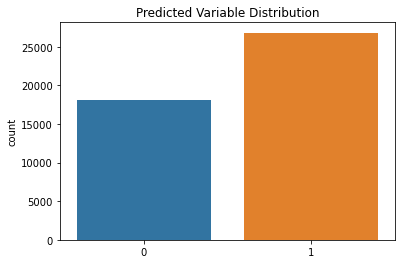

In [34]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict_proba(test_df)[:, 1]

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [35]:
# Create a csv file and upload to zindi 
sub_file.to_csv('umoja1.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.850002
1,ID_0000389416,0.467429
2,ID_0000634789,0.440668
3,ID_0000778100,0.926875
4,ID_0001123210,0.447065


###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************